For this assignment, you will analyse a dataset and apply several machine learning algorithm to it.
You are encouraged to select an interesting dataset yourself, e.g. from the field in which you study.
Alternatively, you can make use of a dataset provided by us. If you choose to utilize a specific
dataset, you should make sure it meets the following criteria:
– At least 1000 items (data points)
– At least 10 features (columns, excluding identifiers etc.), a mix of continuous and discrete
variables
– There should be a clear prediction (regression) task present.
– The dataset is publically accessible (no proprietary data)
In this case, you should send an email with a link to your dataset to the TA-mailbox so we can
verify whether the dataset is appropriate for the assignment.
In the remaining part of this section please add your description of the data set you use and the
learning tasks you will tackle in the next sections. You could look at what variables are present in
the data set, how they are distributed, what type of variables they are. Apply some pre-processing
2 Short Author Names / Group Number
if this is needed to make the data usable1
. You could make us

This code loads and describes the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Load CSV dataset
# df=pd.read_csv("/content/HousePriceDataset (1).csv")
# Load CSV in YW
df=pd.read_csv("HousePriceDataset.csv")
print(f"Number of houses in dataset: {len(df)}")
print(f"Number of variables in dataset: {len(df.columns)}")
df=df.drop(columns=['Unnamed: 0'])
# Display the column names (features) in the dataset
print(f"Features in the dataset: {list(df.columns)}")

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Number of houses in dataset: 21613
Number of variables in dataset: 21
Features in the dataset: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.90000

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from collections import defaultdict

geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get location details using latitude and longitude
def get_location_details(lat, lon):
    location = geolocator.reverse((lat, lon))
    if location:
        return location.address
    else:
        return 'Not found'

unique_coords = df[['lat', 'long']]
coords_info = defaultdict(str)

#for _, row in unique_coords.iterrows():
    #lat, lon = row['lat'], row['long']
    #print(f"Gathering information for coordinates: {lat}, {lon}")
    #print(get_location_details(lat, lon))
    #coords_info[(lat, lon)] = get_location_details(lat, lon)

# Convert the dictionary to a DataFrame for easier viewing
coords_info_df = pd.DataFrame(list(coords_info.items()), columns=['Coordinates', 'Address'])

No 'latitude' and 'longitude' columns found in the dataset.

Coordinates Information:
Empty DataFrame
Columns: [Coordinates, Address]
Index: []


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

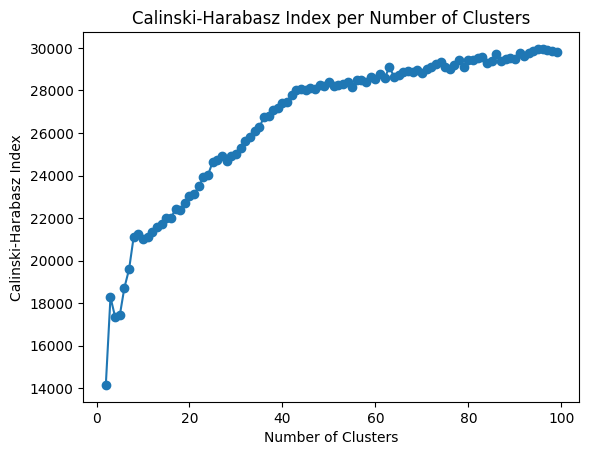

Optimal number of clusters: 95


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


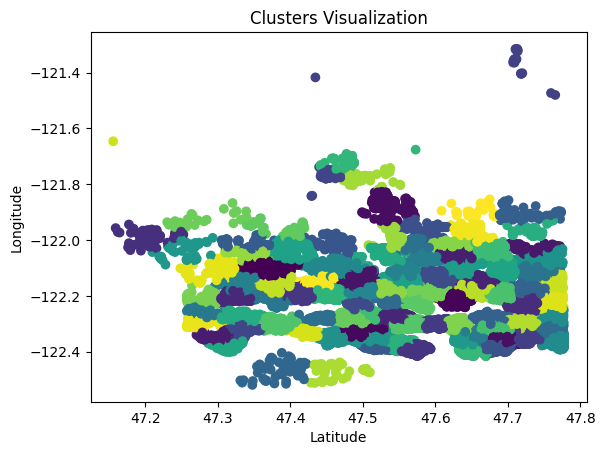

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

coords = df[['lat', 'long']]

# Calculate Calinski-Harabasz index for different numbers of clusters
calinski_harabasz_values = []

# Try many clusters as we scan a large area
n_clusters_range = range(2, 100)
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(coords)
    calinski_harabasz_values.append(calinski_harabasz_score(coords, labels))

# Plot the Calinski-Harabasz index scores
plt.plot(n_clusters_range, calinski_harabasz_values, marker='o')
plt.title('Calinski-Harabasz Index per Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.show()


optimal_clusters = n_clusters_range[calinski_harabasz_values.index(max(calinski_harabasz_values))]
print(f"Optimal number of clusters: {optimal_clusters}")

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(coords)

df['Cluster'] = clusters
plt.scatter(df['lat'], df['long'], c=clusters, cmap='viridis', marker='o')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters Visualization')
plt.show()

# Calculate and map average price for each cluster
avg_prices = df.groupby('Cluster')['price'].mean().to_dict()
df['Avg_Cluster_Price'] = df['Cluster'].map(avg_prices)


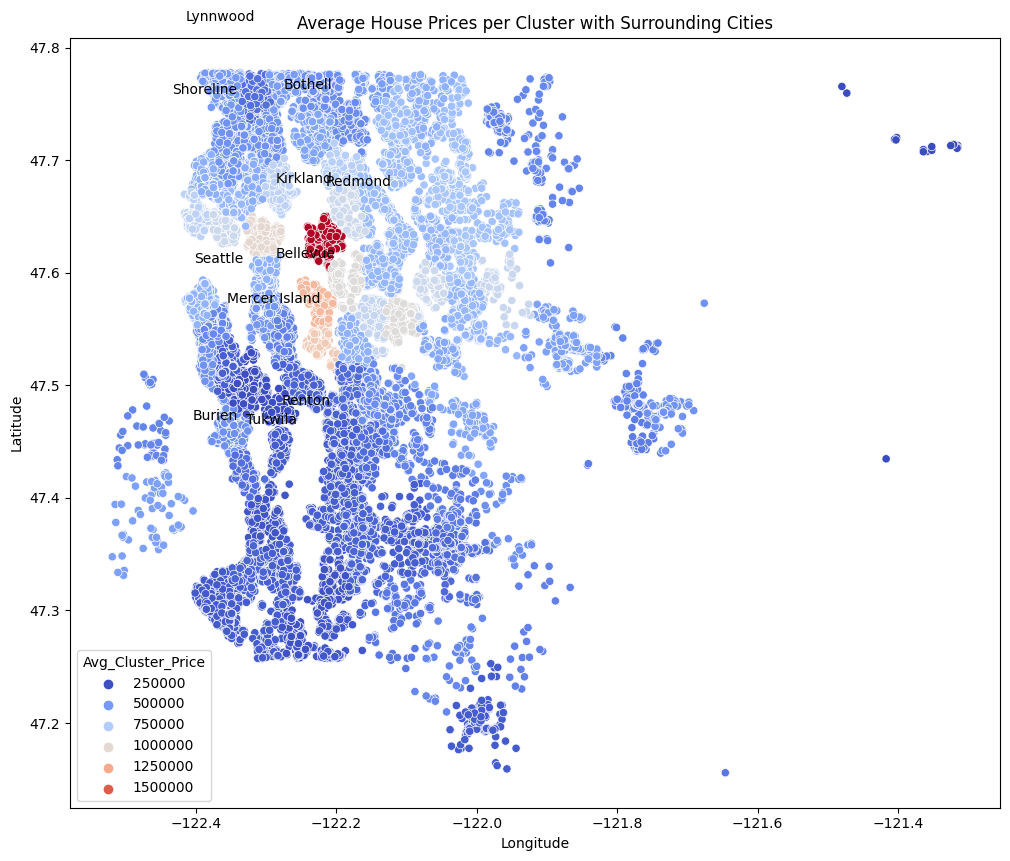

In [38]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
cities = {
    "Seattle": (47.6062, -122.3321),
    "Bellevue": (47.6101, -122.2015),
    "Kirkland": (47.6769, -122.2060),
    "Redmond": (47.6740, -122.1215),
    "Renton": (47.4797, -122.2079),
    "Shoreline": (47.7557, -122.3415),
    "Burien": (47.4668, -122.3405),
    "Tukwila": (47.4627, -122.2559),
    "Mercer Island": (47.5707, -122.2221),
    "Lynnwood": (47.8209, -122.3151),
    "Bothell": (47.7601, -122.2054)
}

# Create a scatter plot with heatmap
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='long', y='lat', hue='Avg_Cluster_Price',
                sizes=(20, 200), palette='coolwarm')

# Plot each city and add the city name
for city, (lat, lon) in cities.items():
    plt.text(lon, lat, city, fontsize=10, ha='right', va='bottom')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average House Prices per Cluster with Surrounding Cities')
plt.show()





